In [1]:
#!python -m pip install --upgrade pip

In [2]:
#show result directly
#%pylab inline
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.cluster import KMeans
#from sklearn import preprocessing,cross_validation
 

churn = pd.read_csv('../datasets/Churn.csv') 

# Data Exploration

In [4]:
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
#churn.dtypes

In [7]:
#explore numerical data
churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
# manage if there is negative
#churn1 = churn.drop(churn[churn.revenue < 0].index)
#churn2 = churn1.drop(churn1[churn1.eqpdays < 0].index)

In [12]:
#explore non numerical data
churn['Churn'] 

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## تحليل التوزيع >> Analysis of Distribution

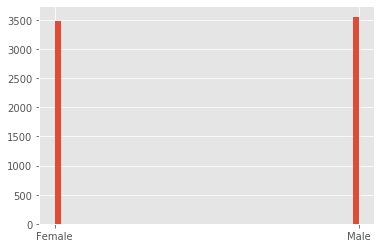

In [19]:
#bins _> x-axis cosider count 
# y-axis consider values
churn['gender'].hist(bins=50)

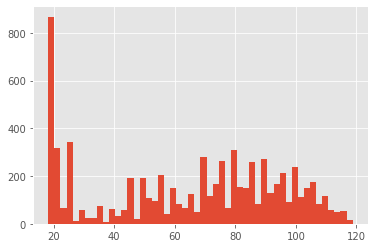

In [6]:
churn['MonthlyCharges'].hist(bins=50)

In [7]:
#combine between more attricute/column to study dataset better
#temp1= pd.crosstab(churn['total eve calls'],churn['churn'])
#temp1.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

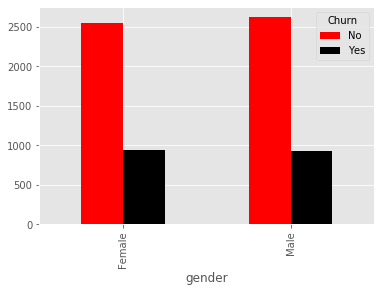

In [20]:
r1_churn_Mchurge= pd.crosstab(churn["gender"],churn["Churn"])
r1_churn_Mchurge.plot(kind='bar',color=["red","black"])

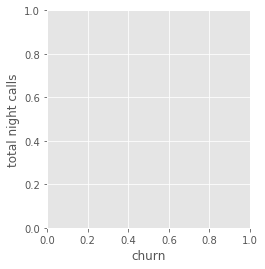

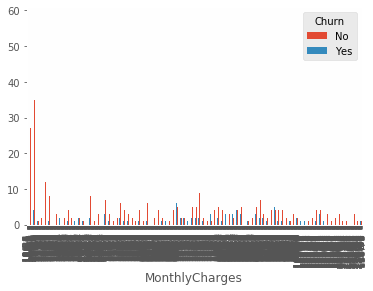

In [14]:
#another way
import matplotlib.pyplot as plt
fig =plt.figure(figsize=[8,4])
ax1=fig.add_subplot(121)
ax1.set_ylabel('total night calls')
ax1.set_xlabel('churn')
r1_churn_Mchurge.plot(kind='bar')

# Data cleaning and preparation

### prepare non numerical data

#### missing values in the dataset : 

##### 1- fill--> non/standard types ( NAN , NA , na , nan , " " ) 
##### 2- convert--> unexpected data type (string--> yes,no,true...... to int--> 0,1,2,3......)


In [24]:
#churn.convert_objects(convert_numeric=True)
churn.fillna(0, inplace=True)

def handle_non_numerical_data(churn):
    columns=churn.columns.values
    
    for column in columns:
        text_digit_vals={'yes':1,'no':0}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if churn[column].dtypes != np.int64 and churn[column].dtypes != np.float64:
            column_contents=churn[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            churn[column]=list(map(convert_to_int,churn[column]))
                                
    return churn
                                
churn= handle_non_numerical_data(churn)                              


In [25]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1131,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,3,29.85,177,0
1,4781,0,0,0,0,34,1,1,1,1,...,1,0,0,0,2,0,2,56.95,5994,0
2,1618,0,0,0,0,2,1,1,1,1,...,0,0,0,0,0,1,2,53.85,3066,1
3,5987,0,0,0,0,45,0,0,1,1,...,1,1,0,0,2,0,1,42.30,3126,0
4,4803,1,0,0,0,2,1,1,2,0,...,0,0,0,0,0,1,3,70.70,4506,1


#### put in dataframe and distribute to X and y


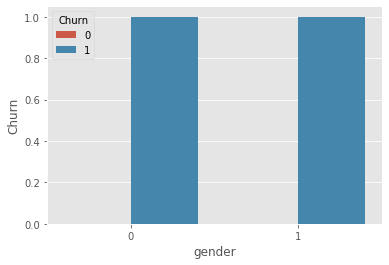

In [37]:
import seaborn as sns
sns.barplot(x=churn["gender"],y=churn["Churn"],hue=churn["Churn"])

In [ ]:
X = pd.DataFrame(churn, columns = [
#"state",                                   #"state","phone number","international plan"and "voice mail plan",                 
                                            #problem :  data type is string\object 
"international plan",
"voice mail plan" ,                                 
"account length" ,                   
"area code",             
"number vmail messages",          
"total day minutes" ,             
"total day calls",        
"total day charge" ,      
"total eve minutes" ,    
"total eve calls"   ,   
"total eve charge" ,   
"total night minutes",         
"total night calls",         
"total night charge",     
"total intl minutes" ,           
"total intl calls",
"total intl charge",                                   
"customer service calls",
])

y = pd.DataFrame(churn, columns = ["churn"])


#### prepare non numerical data after putting in dataframe


from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
churn['account length']=le.fit_transform(churn['account length'])
churn['area code']=le.fit_transform(churn['area code'])
churn['number vmail messages']=le.fit_transform(churn['number vmail messages'])
churn['total day minutes']=le.fit_transform(churn['total day minutes'])
churn['total day calls']=le.fit_transform(churn['total day calls'])
churn['total day charge']=le.fit_transform(churn['total day charge'])
churn['total eve minutes']=le.fit_transform(churn['total eve minutes'])
churn['total eve calls']=le.fit_transform(churn['total eve calls'])
churn['total eve charge']=le.fit_transform(churn['total eve charge'])
churn['total night minutes']=le.fit_transform(churn['total night minutes'])
churn['total night calls']=le.fit_transform(churn['total night calls'])
churn['total night charge']=le.fit_transform(churn['total night charge'])
churn['total intl minutes']=le.fit_transform(churn['total intl minutes'])
churn['total intl charge']=le.fit_transform(churn['total intl charge'])
churn['customer service calls']=le.fit_transform(churn['customer service calls'])

churn['churn']=le.fit_transform(churn['churn'])
y.dtypes

In [ ]:
#X.head(5)

In [ ]:
#X.dtypes

#away to split dataset colomns into x , y simple
#X =churn.iloc[:,:].values
#print(X)
#y =churn.iloc[:,20:].values
#print(y)

In [ ]:
#shuffle to improve accuracy
from sklearn.utils import shuffle
X,y=shuffle(X,y)

# Building a Predictive Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y,test_size = 0.3, random_state = 0)


In [ ]:
len(y_test)

# prepare adata frame for model analysis

## decision tree model


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
prediction =clf.predict(X_test)
#print(prediction)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

clf=DecisionTreeClassifier()
clf.fit(X_train_scaled,y_train.values.ravel())

prediction =clf.predict(X_test_scaled)


#### accuracy


In [30]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,prediction))


accuracy = 90.3


In [31]:
#print(prediction)
len(prediction)

1000

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[810,  45],
       [ 52,  93]], dtype=int64)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prediction)

0.097

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       855
          1       0.67      0.64      0.66       145

avg / total       0.90      0.90      0.90      1000



# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# fit model no training data

model = XGBClassifier()
model.fit(X_train, y_train.values.ravel())
# plot single tree
plot_tree(model)
plt.show()

## random forest model


In [35]:
#from sklearn.feature_selection import RFECV

In [ ]:
#m=RFECV(RandomForestClassifier(),scoring='roc_auc')
#m.fit(X,y.values.ravel())

In [ ]:
#m.score(X,y)

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf = clf_rf.fit(X_train, y_train.values.ravel())   ## .values.ravel() solve y vector problem
prediction =clf.predict(X_test)
#print(prediction)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

clf_rf=RandomForestClassifier(n_estimators=15)
clf_rf.fit(X_train_scaled,y_train.values.ravel())

prediction =clf_rf.predict(X_test_scaled)


#### accuracy


In [10]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,prediction))

NameError: name 'y_test' is not defined

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prediction)

0.058

#### Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[846,   9],
       [ 49,  96]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       855
          1       0.91      0.66      0.77       145

avg / total       0.94      0.94      0.94      1000



In [42]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

total day charge          0.181532
customer service calls    0.114125
total intl calls          0.098700
international plan        0.085660
total intl minutes        0.084785
total day minutes         0.079687
total eve charge          0.069019
total eve minutes         0.057198
voice mail plan           0.039679
total eve calls           0.032959
total day calls           0.032334
account length            0.026549
total night charge        0.026321
total intl charge         0.021539
total night calls         0.014701
total night minutes       0.013434
number vmail messages     0.012538
area code                 0.009238
dtype: float64

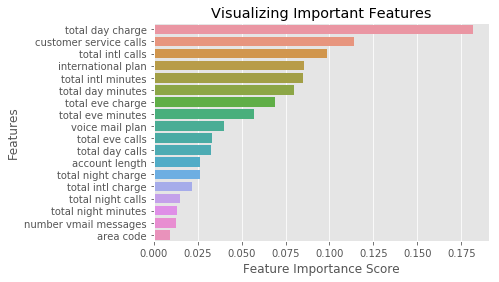

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [44]:
X = pd.DataFrame(churn, columns = [
#"state",                                   #"state","phone number","international plan"and "voice mail plan",                 
                                            #problem :  data type is string\object 
"international plan",
"voice mail plan" ,                                 
"account length" ,                   
#"area code",             
#"number vmail messages",          
"total day minutes" ,             
#"total day calls",        
"total day charge" ,      
"total eve minutes" ,    
"total eve calls"   ,   
#"total eve charge" ,   
"total night minutes",         
#"total night calls",         
"total night charge",     
#"total intl minutes" ,           
"total intl calls",
"total intl charge",                                   
"customer service calls",
])

y = pd.DataFrame(churn, columns = ["churn"])


In [45]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf = clf_rf.fit(X_train, y_train.values.ravel())   ## .values.ravel() solve y vector problem
prediction =clf.predict(X_test)
#print(prediction)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

clf_rf=RandomForestClassifier(n_estimators=15)
clf_rf.fit(X_train_scaled,y_train.values.ravel())

prediction =clf_rf.predict(X_test_scaled)


In [47]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,prediction))

accuracy = 94.3


In [48]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train.values.ravel())
prediction =mlp.predict(X_test)


#### accuracy


In [49]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,prediction))


accuracy = 86.5


#### imorove model

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(X_train_scaled,y_train.values.ravel())

prediction =mlp.predict(X_test_scaled)


#### accuracy


In [51]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,prediction))



accuracy = 92.7


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       855
          1       0.88      0.57      0.69       145

avg / total       0.92      0.93      0.92      1000



# Evaluating Model
###cross validation(select best model)
####kfold

In [591]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [592]:
for train_index,test_index in kf.split(X,y):
    print(train_index,test_index)

[ 334  335  336 ... 3330 3331 3332] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [597]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [ ]:
print(get_score(mlp,X_train, X_test, y_train, y_test))

print(get_score(clf_rf,X_train, X_test, y_train, y_test))

print(get_score(clf,X_train, X_test, y_train, y_test))

#### stratifiedkfold

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y.ravel(), cv=2)
                                              
